# Understaing the Problem

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns


resenha = pd.read_csv("data/imdb-reviews-pt-br.csv")
resenha

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


In [3]:
resenha["classificacao"] = resenha.sentiment.replace({"neg": 0, "pos":1})
resenha

C:\Users\lreis\AppData\Local\Temp\ipykernel_4260\751926162.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  resenha["classificacao"] = resenha.sentiment.replace({"neg": 0, "pos":1})


,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


In [4]:
X_train, X_test, y_train, y_test = train_test_split(resenha.text_pt, resenha.sentiment, 
                                                    random_state=42)

Elucidanting the problem the requires natural language processing. You can't train data on texts 

In [5]:
# regressao_logistica = LogisticRegression()
# regressao_logistica.fit(X_train, y_train)
# acuracia = regressao_logistica.score(X_test, y_test)
# acuracia

In [6]:
print("Negativa\n")
print(resenha.text_pt[189])

Negativa

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [7]:
print("Positivo\n")
print(resenha.text_pt[49002])

Positivo

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maior

In [8]:
resenha.sentiment.value_counts()

sentiment
neg    24765
pos    24694
Name: count, dtype: int64

# Bag of Words

## Initial Example

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um Filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

vetorizar.get_feature_names_out()

array(['Assisti', 'Filme', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [10]:
matriz_sparse = pd.DataFrame.sparse.from_spmatrix(bag_of_words, 
                                                  columns=vetorizar.get_feature_names_out())
matriz_sparse

,Assisti,Filme,filme,ruim,um,ótimo
0,1,1,0,0,1,1
1,1,0,1,1,1,0


## Problem at Hand

Usually this problem gets really heavy with such a high number of features, so it is common to limit the max.

In [11]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
bag_of_words.shape

(49459, 50)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, 
                                                    resenha.classificacao, 
                                                    random_state=42)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_train, y_train)
acuracia = regressao_logistica.score(X_test, y_test)
acuracia

0.6583097452486858

In [13]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])

    X_train, X_test, y_train, y_test = train_test_split(bag_of_words, 
                                                    texto[coluna_classificacao], 
                                                    random_state=42)

    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(X_train, y_train)
    acuracia = regressao_logistica.score(X_test, y_test)

    return acuracia

In [14]:
classificar_texto(resenha, "text_pt", "classificacao")

0.6583097452486858

# Word Cloud

In [15]:
from wordcloud import WordCloud

todas_palavras = " ".join([text for text in resenha.text_pt])

nuvem_palavras = WordCloud(width=800, height=500,
                           max_font_size=110, collocations=False)
nuvem_palavras.generate(todas_palavras)

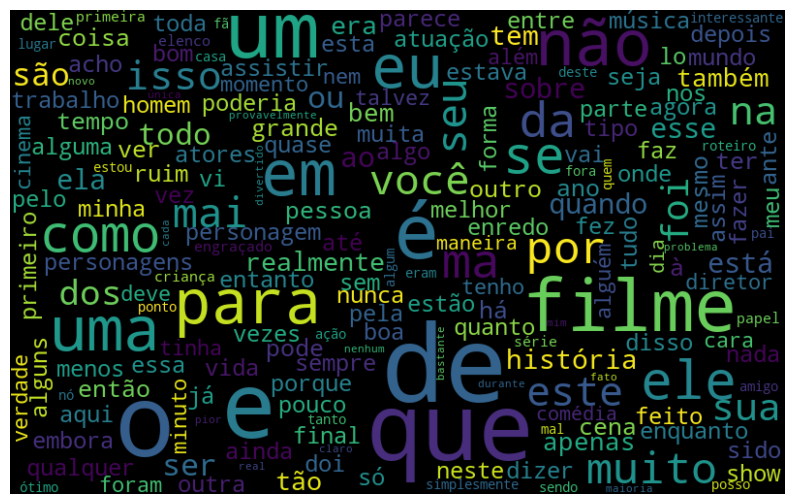

In [16]:
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation="bilinear")
plt.axis("off")
plt.show()

### Splitting Positive and Negative Words

In [17]:
def nuvem_words(texto, coluna_texto, sentimento):
    todas_palavras = texto[texto.sentiment == sentimento]

    todas_palavras = " ".join([text for text in todas_palavras[coluna_texto]])

    nuvem_palavras = WordCloud(width=800, height=500,
                            max_font_size=110, collocations=False)
    nuvem_palavras.generate(todas_palavras)

    plt.figure(figsize=(10, 7))
    plt.imshow(nuvem_palavras, interpolation="bilinear")
    plt.axis("off")
    plt.show()

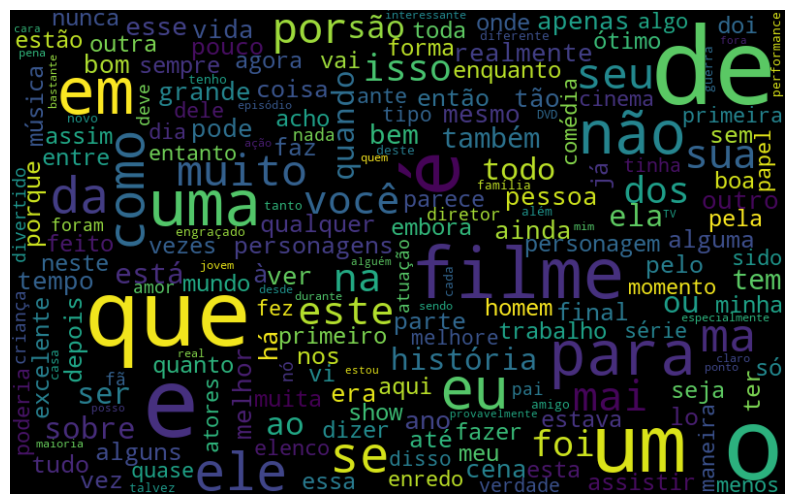

In [18]:
nuvem_words(resenha, "text_pt", 'pos')

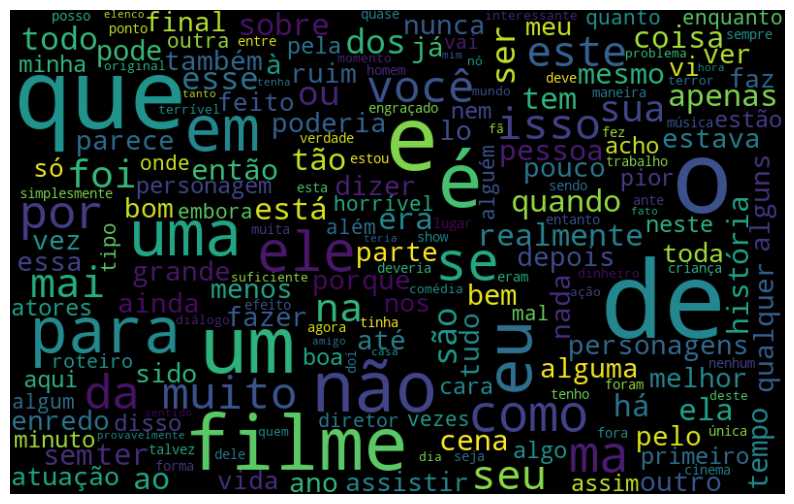

In [19]:
nuvem_words(resenha, "text_pt", 'neg')

# NLTK

In [20]:
import nltk

token_espaco = nltk.tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)

frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'de': 417651, 'que': 325070, 'e': 299743, 'o': 244881, 'um': 216410, 'a': 210179, 'é': 192381, 'em': 132778, 'uma': 130888, 'não': 127915, ...})

In [21]:
df_frequencia = pd.DataFrame({"palavra": list(frequencia.keys()), 
                              "frequencia": list(frequencia.values())})
df_frequencia

,palavra,frequencia
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741
...,...,...
348280,"Muppified,",1
348281,inventora,1
348282,"""Union",1
348283,beirar,1


In [22]:
df_frequencia.nlargest(columns="frequencia", n=10)

,palavra,frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


In [23]:
df_frequencia_analyse = df_frequencia.nlargest(columns="frequencia", n=10)

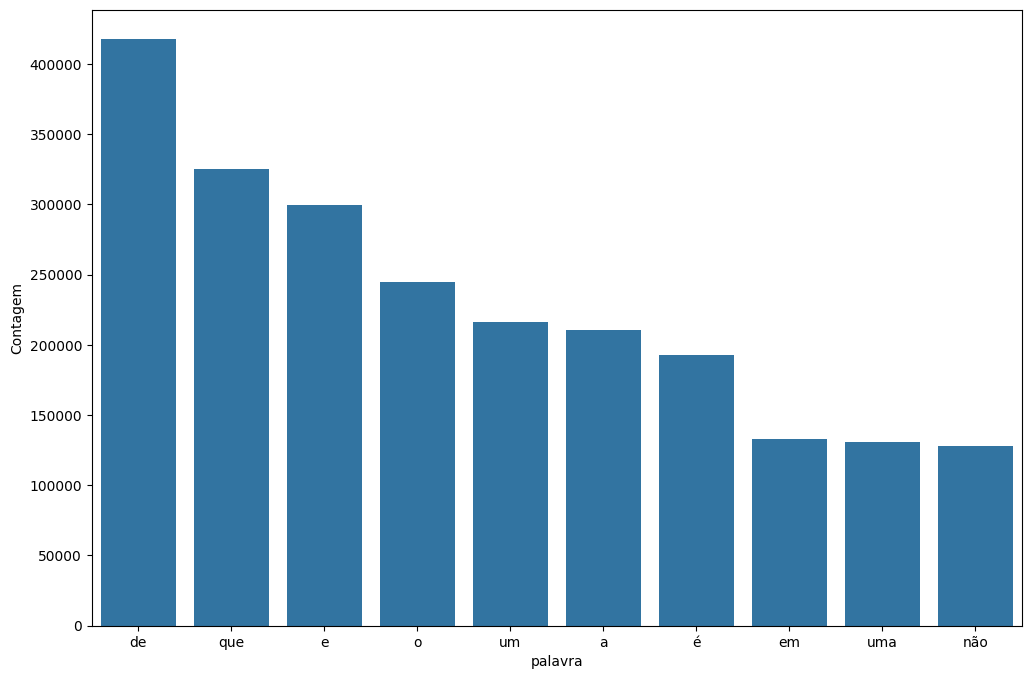

In [24]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_frequencia_analyse, x="palavra", y="frequencia")
plt.ylabel("Contagem")
plt.show()

In [25]:
def histogram(texto, coluna_texto, quantidade):

    todas_palavras = " ".join([text for text in texto[coluna_texto]])

    token_espaco = nltk.tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(todas_palavras)

    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"palavra": list(frequencia.keys()), 
                              "frequencia": list(frequencia.values())})
    
    df_frequencia_analyse = df_frequencia.nlargest(columns="frequencia", n=quantidade)

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df_frequencia_analyse, x="palavra", y="frequencia")
    plt.ylabel("Contagem")
    plt.show()

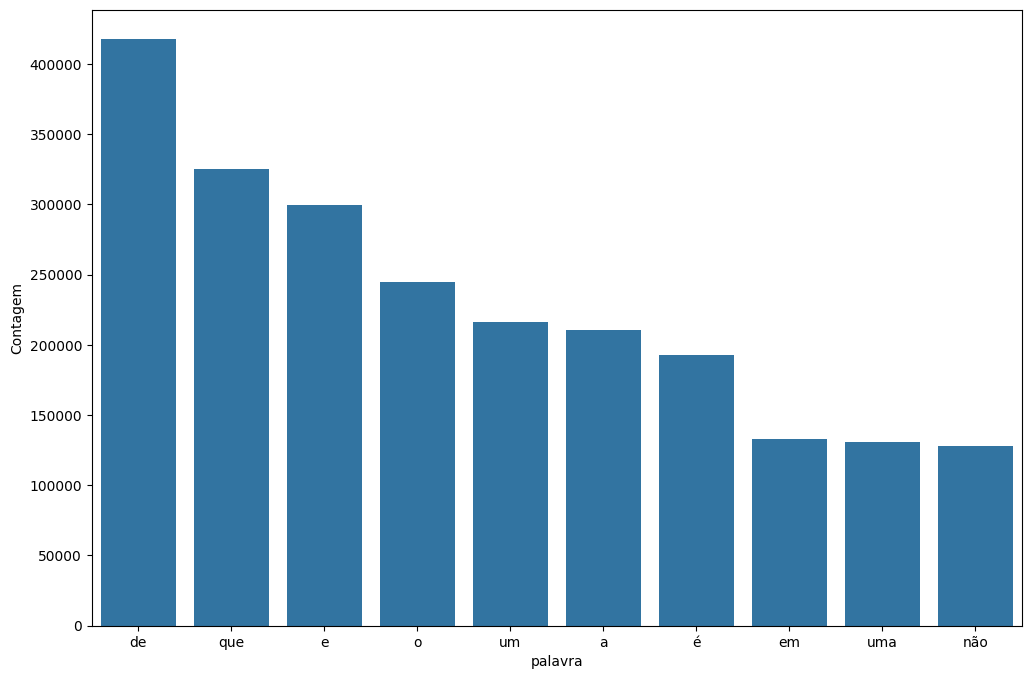

In [26]:
histogram(resenha, "text_pt", 10)

# Removing Stop Words

In [27]:
stop_words = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for item in resenha.text_pt:
    nova_frase = list()
    token_espaco = nltk.tokenize.WhitespaceTokenizer()
    palavras_texto = token_espaco.tokenize(item)

    for palavra in palavras_texto:
        if palavra not in stop_words:
            nova_frase.append(palavra)
    
    frase_processada.append(" ".join(nova_frase))

resenha["tratamento_1"] = frase_processada

In [28]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


## That's a significant improvement in accuracy!

In [29]:
classificar_texto(resenha, "tratamento_1", "classificacao")

0.6810351799433886

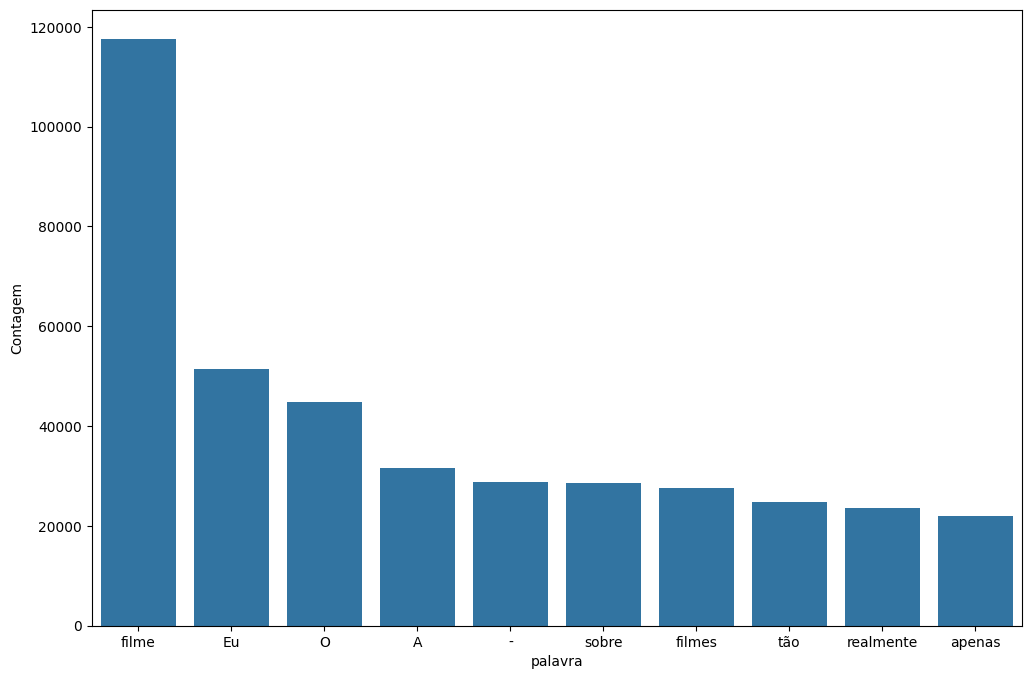

In [30]:
histogram(resenha, "tratamento_1", 10)

# Separating Punctuation from Words


In [38]:
from string import punctuation

pontuacao = [ponto for ponto in punctuation]
pontuacao_stopwords = stop_words + pontuacao

In [39]:
frase_processada = list()
for item in resenha["tratamento_1"]:
    nova_frase = list()
    token_espaco = nltk.tokenize.WordPunctTokenizer()
    palavras_texto = token_espaco.tokenize(item)

    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    
    frase_processada.append(" ".join(nova_frase))

resenha["tratamento_2"] = frase_processada


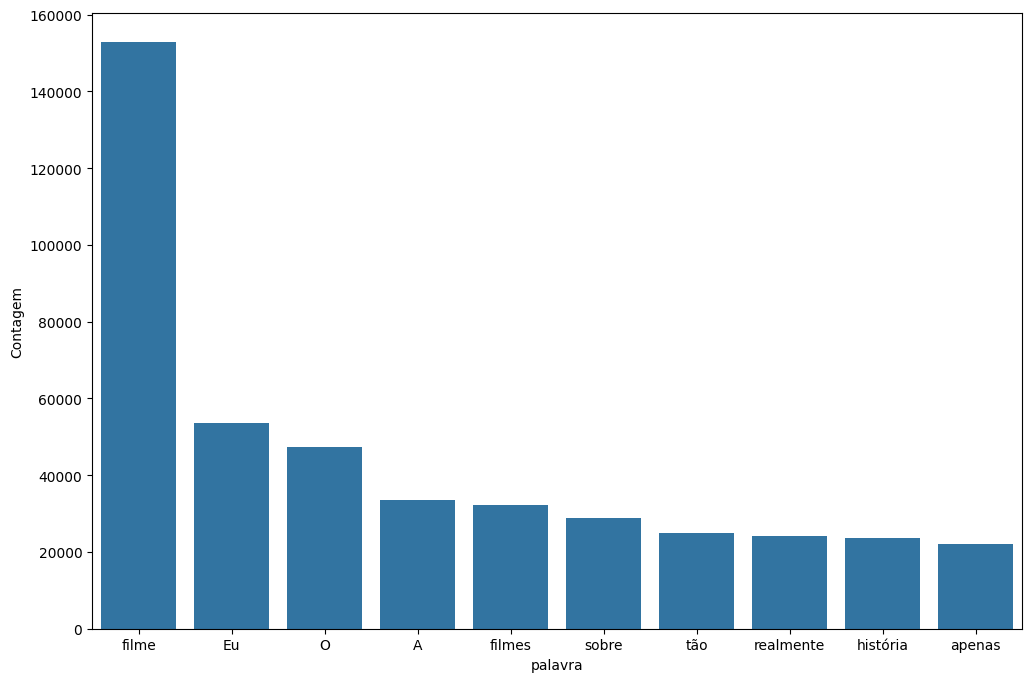

In [40]:
histogram(resenha, "tratamento_2", 10)

# Removing Accents

In [46]:
import unidecode

stop_words_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

resenha["tratamento_3"] = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]

In [59]:
frase_processada = list()
for item in resenha["tratamento_3"]:
    nova_frase = list()
    token_espaco = nltk.tokenize.WordPunctTokenizer()
    palavras_texto = token_espaco.tokenize(item)

    for palavra in palavras_texto:
        if palavra not in stop_words_sem_acento:
            nova_frase.append(palavra)
    
    frase_processada.append(" ".join(nova_frase))

resenha["tratamento_3"] = frase_processada

In [52]:
classificar_texto(resenha, "tratamento_3", "classificacao")

0.6887990295188031

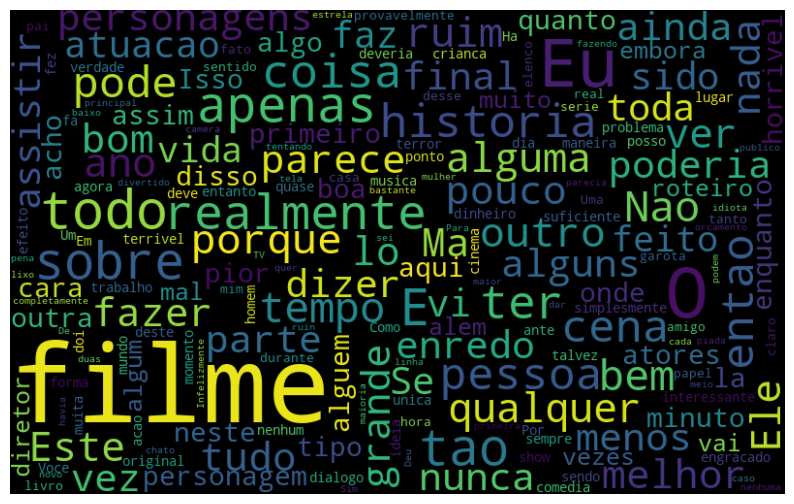

In [54]:
nuvem_words(resenha, "tratamento_3", "neg")

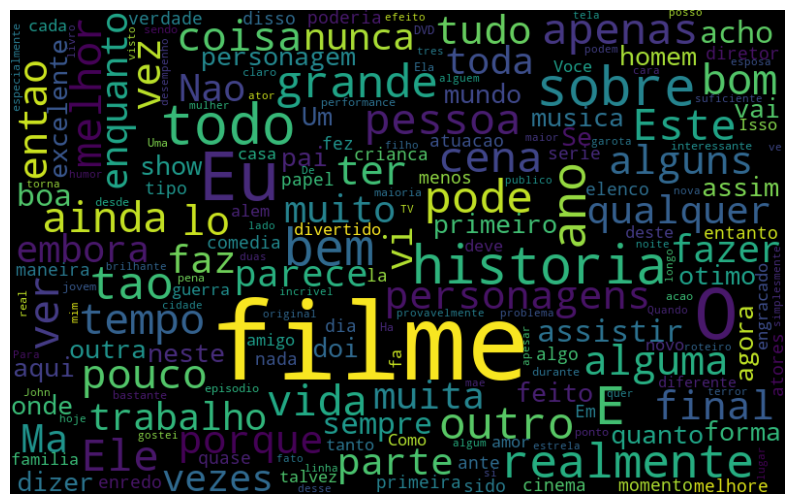

In [55]:
nuvem_words(resenha, "tratamento_3", "pos")

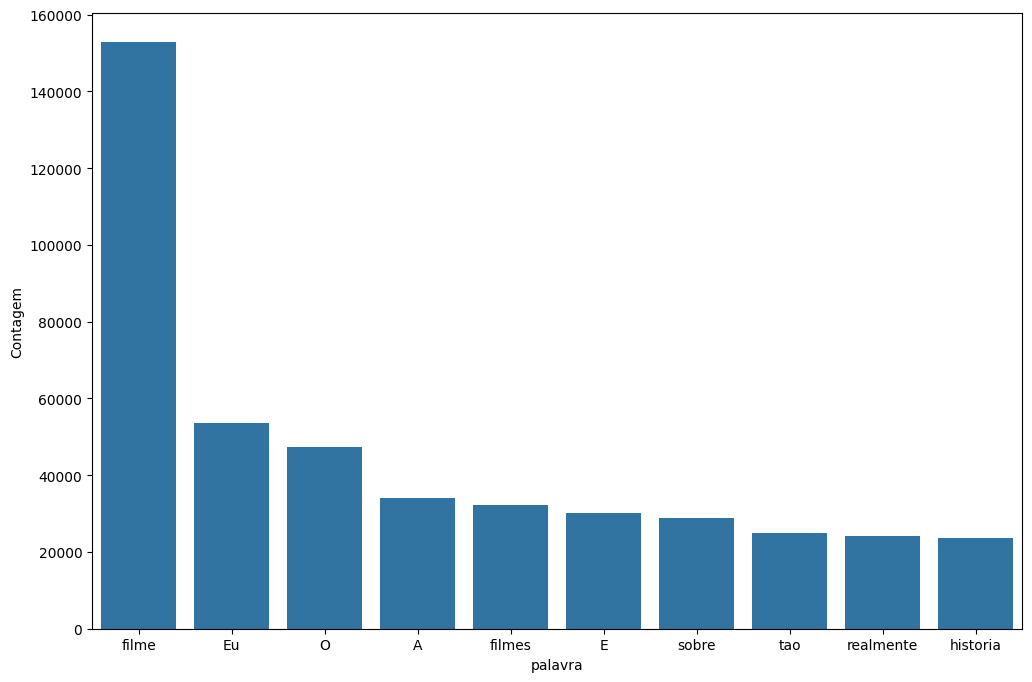

In [58]:
histogram(resenha, "tratamento_3", 10)

# Transforming Everything in Lowercase

In [60]:
frase_processada = list()
token_espaco = nltk.tokenize.WordPunctTokenizer()
for item in resenha["tratamento_3"]:
    nova_frase = list()
    item = item.lower()
    palavras_texto = token_espaco.tokenize(item)

    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    
    frase_processada.append(" ".join(nova_frase))

resenha["tratamento_4"] = frase_processada

In [62]:
classificar_texto(resenha, "tratamento_4", "classificacao")

0.6910634856449657

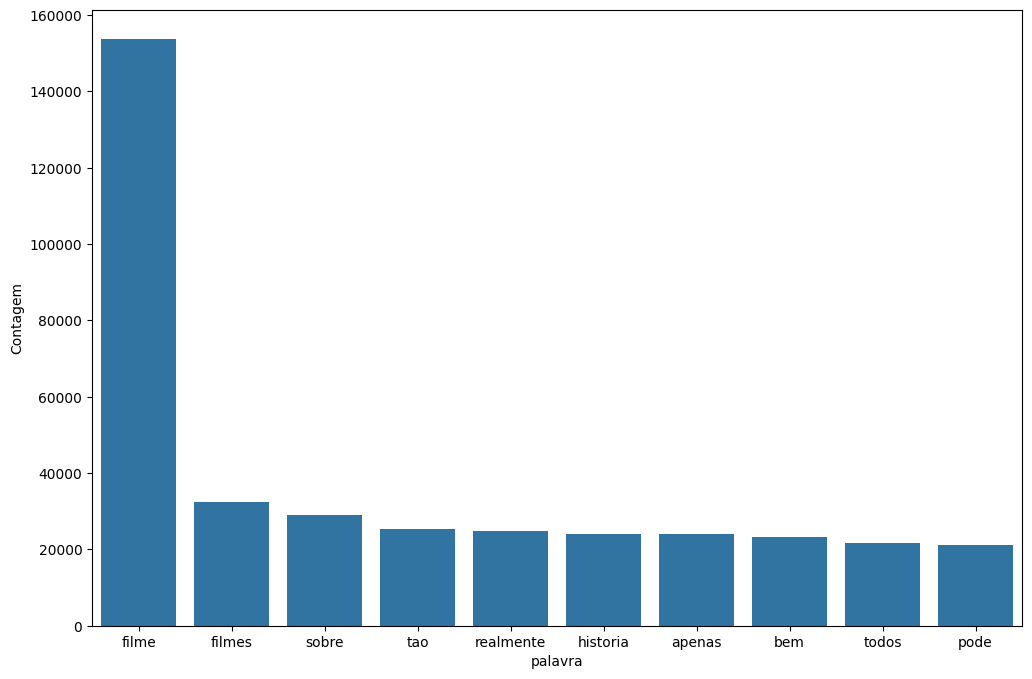

In [64]:
histogram(resenha, "tratamento_4", 10)

# Stemming

In [71]:
stemmer = nltk.RSLPStemmer()

frase_processada = list()
token_espaco = nltk.tokenize.WordPunctTokenizer()
for item in resenha["tratamento_4"]:
    nova_frase = list()
    item = item.lower()
    palavras_texto = token_espaco.tokenize(item)

    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            stem = stemmer.stem(palavra)
            nova_frase.append(stem)
    
    frase_processada.append(" ".join(nova_frase))

resenha["tratamento_5"] = frase_processada

In [73]:
classificar_texto(resenha, "tratamento_5", "classificacao")

0.7010917913465426

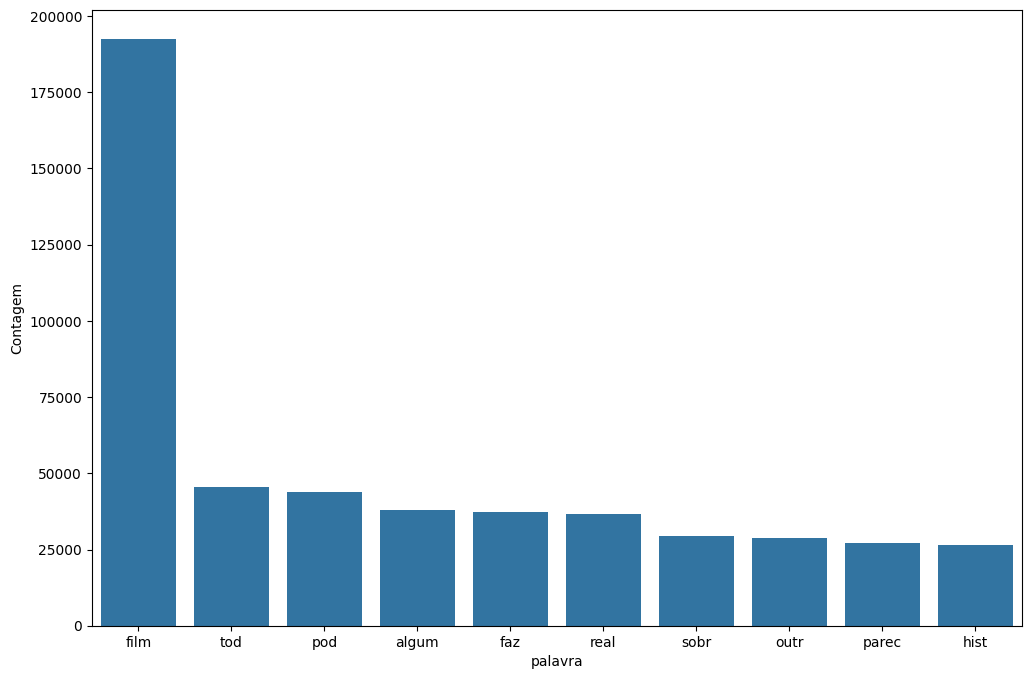

In [74]:
histogram(resenha, "tratamento_5", 10)

# TF-IDF

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Assisti um filme ótimo", "Assisti um filme péssimo"]

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristicas = tfidf.fit_transform(frases)
pd.DataFrame(caracteristicas.todense(), columns=tfidf.get_feature_names_out())

,Assisti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

tfidf_bruto = tfidf.fit_transform(resenha["text_pt"])
X_train, X_test, y_train, y_test = train_test_split(tfidf_bruto, 
                                                    resenha["classificacao"],
                                                    random_state=42)

regressao_logistica.fit(X_train, y_train)
regressao_logistica.score(X_test, y_test)

0.6604933279417712

### TF-IDF Treated Data

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

tfidf_tratado = tfidf.fit_transform(resenha["tratamento_5"])
X_train, X_test, y_train, y_test = train_test_split(tfidf_tratado, 
                                                    resenha["classificacao"],
                                                    random_state=42)

regressao_logistica.fit(X_train, y_train)
regressao_logistica.score(X_test, y_test)

0.7027092600080873

# Ngrams

In [82]:
frase = "Assisti um ótimo filme."
frase_separada = token_espaco.tokenize(frase)
pares = nltk.ngrams(frase_separada, 2)
print(frase_separada)
list(pares)

['Assisti', 'um', 'ótimo', 'filme', '.']


[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme'), ('filme', '.')]

Com ngrams

In [85]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1, 2))
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])

X_train, X_test, y_train, y_test = train_test_split(vetor_tfidf, 
                                                    resenha["classificacao"],
                                                    random_state=42)

regressao_logistica.fit(X_train, y_train)
regressao_logistica.score(X_test, y_test)

0.8858067124949454

Sem ngrams

In [86]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])

X_train, X_test, y_train, y_test = train_test_split(vetor_tfidf, 
                                                    resenha["classificacao"],
                                                    random_state=42)

regressao_logistica.fit(X_train, y_train)
regressao_logistica.score(X_test, y_test)

0.8856449656287909

In [88]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names_out()
)

pesos.nlargest(10, 0)

,0
otim,8.193745
excel,7.937193
perfeit,6.574738
favorit,5.784332
maravilh,5.261876
incri,4.911405
hilari,4.804645
divert,4.543901
ador,4.415377
agrada,4.259870


In [89]:
pesos.nsmallest(10, 0)

,0
ruim,-9.022761
pi,-8.997668
horri,-8.660346
terri,-7.108213
chat,-6.905016
nad,-5.758506
infeliz,-5.374104
decepca,-5.151177
decepcion,-5.087600
ridicul,-5.066992
